In [1]:
from torchvision import datasets

In [2]:
# load the dataset
dataset = datasets.ImageFolder(root="../../../Driver Drowsiness Dataset (DDD)")

# print the class labels
print(dataset.classes)

['Drowsy', 'Non Drowsy']


In [3]:
# view dataset size

print(len(dataset))

41793


In [4]:
# number of images in each class

class_counts = {}

for _, label in dataset.samples:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print(f'Drowsy: {class_counts[0]}')
print(f'Not Drowsy: {class_counts[1]}')

Drowsy: 22348
Not Drowsy: 19445


In [5]:
import random

In [6]:
random.seed(43)

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

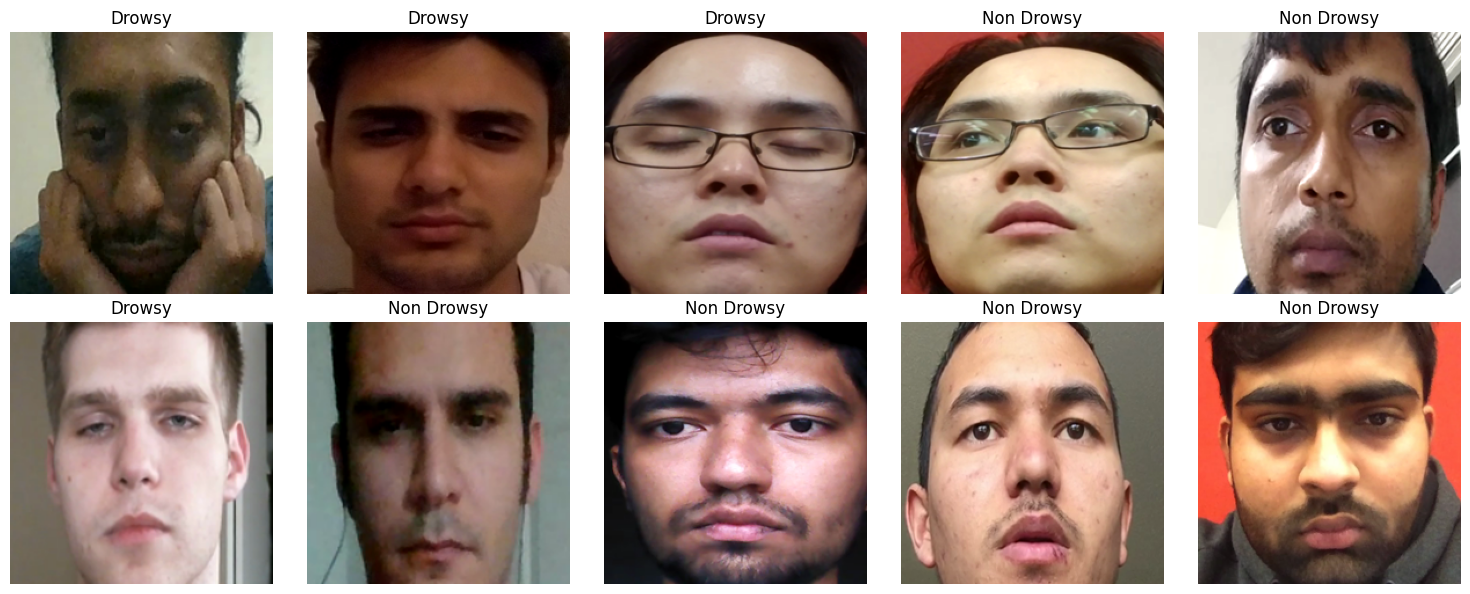

In [8]:
# print 10 random samples from the dataset

random_samples = random.sample(dataset.samples, 10)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i, (image_path, label) in enumerate(random_samples):
    image = Image.open(image_path)
    ax = axs[i // 5, i % 5]
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(dataset.classes[label])

plt.tight_layout()
plt.show()

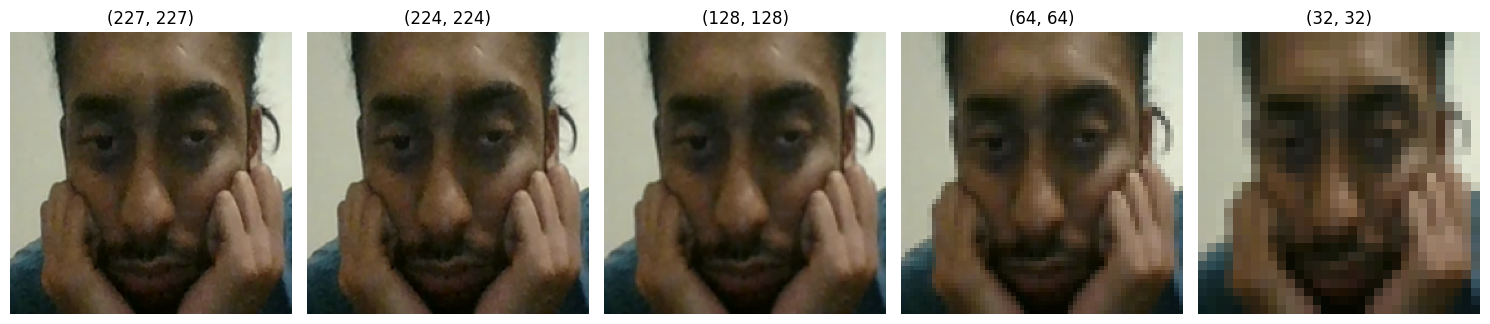

In [9]:
image = Image.open(random_samples[0][0])

# resize the image to different sizes
image_original = image
image_224 = image.resize((224, 224))
image_128 = image.resize((128, 128))
image_64 = image.resize((64, 64))
image_32 = image.resize((32, 32))

# show images
images = [image_original, image_224, image_128, image_64, image_32]

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(img.size)

plt.tight_layout()
plt.show()

In [10]:
from torchvision import transforms

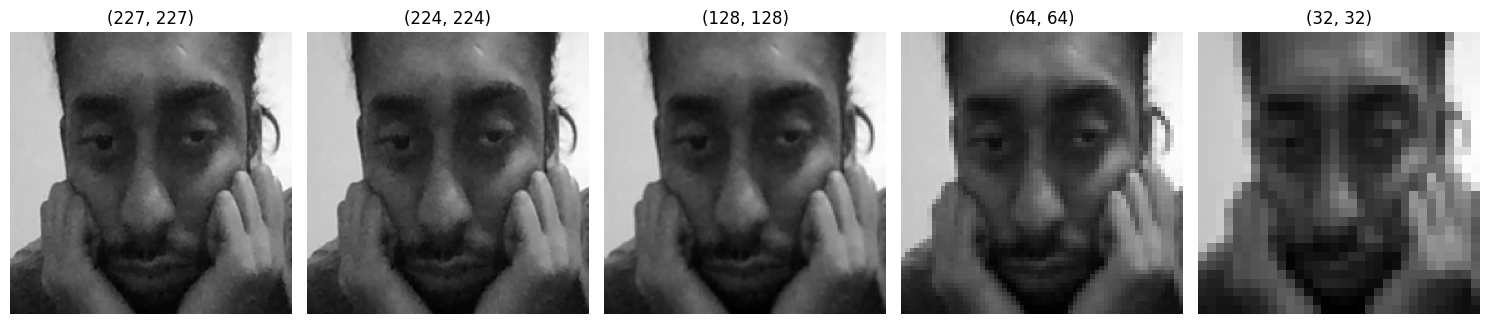

In [11]:
# convert the image to grayscale
grayscale_transform = transforms.Grayscale(num_output_channels=1)

# resize the grayscale image to different sizes
image_gray_original = grayscale_transform(image_original)
image_gray_224 = grayscale_transform(image_224)
image_gray_128 = grayscale_transform(image_128)
image_gray_64 = grayscale_transform(image_64)
image_gray_32 = grayscale_transform(image_32)

# show images
images_gray = [image_gray_original, image_gray_224, image_gray_128, image_gray_64, image_gray_32]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, img in enumerate(images_gray):
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(img.size)

plt.tight_layout()
plt.show()

In [12]:
# load the dataset
gesture_dt = datasets.ImageFolder(root="../../../Hand Gesture Dataset")

# print the class labels
print(gesture_dt.classes)

['paper', 'rock']


In [13]:
# view dataset size

print(len(gesture_dt))

1438


In [14]:
# Count the number of images in each class
gesture_class_counts = {}

for _, label in gesture_dt.samples:
    if label not in gesture_class_counts:
        gesture_class_counts[label] = 0
    gesture_class_counts[label] += 1

# Print counts
for idx, count in gesture_class_counts.items():
    print(f"{gesture_dt.classes[idx]}: {count}")

paper: 712
rock: 726


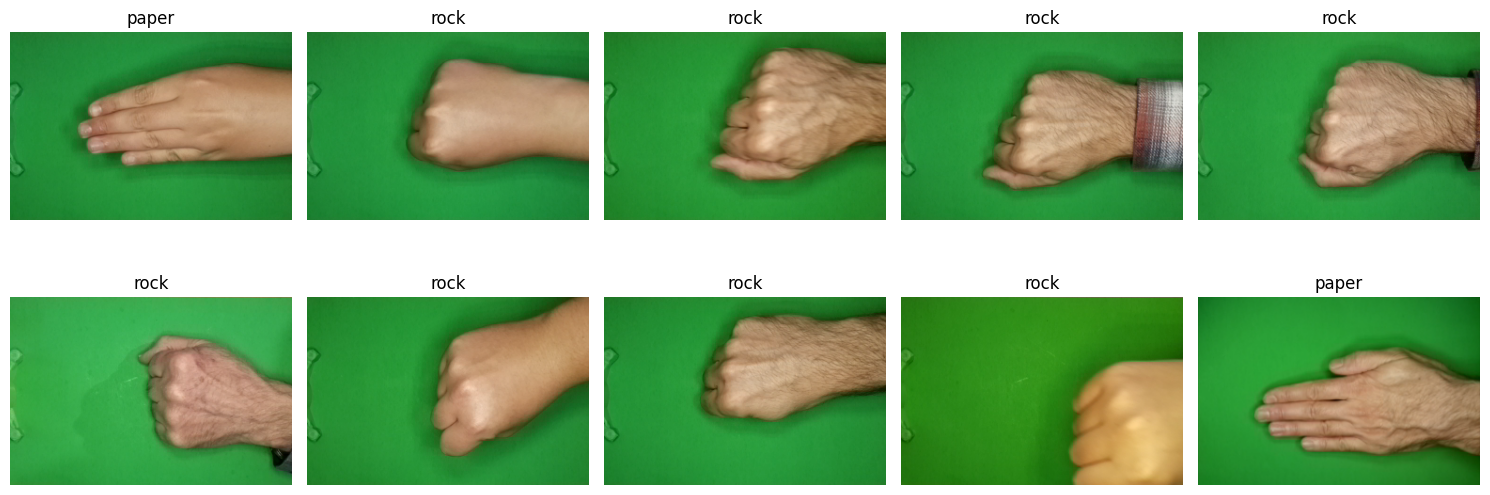

In [15]:
# print 10 random samples from the dataset

random_samples = random.sample(gesture_dt.samples, 10)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i, (image_path, label) in enumerate(random_samples):
    image = Image.open(image_path)
    ax = axs[i // 5, i % 5]
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(gesture_dt.classes[label])

plt.tight_layout()
plt.show()

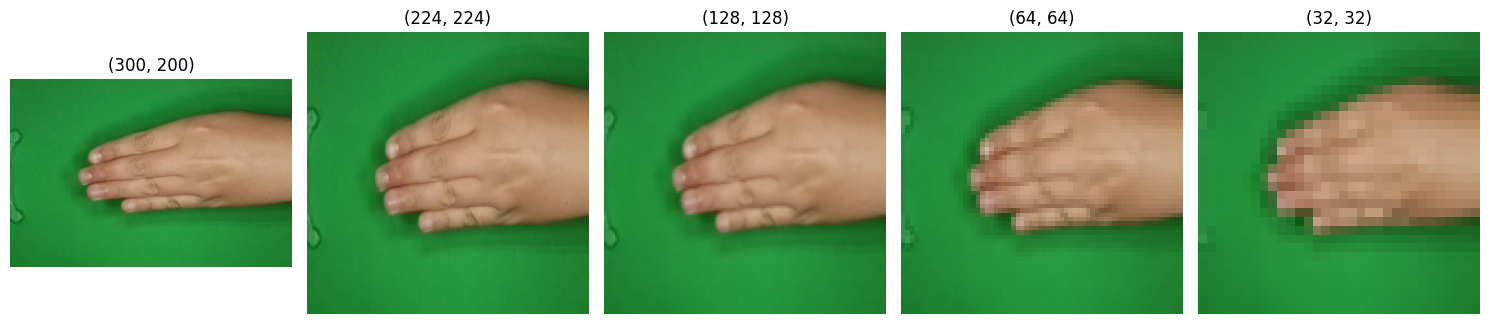

In [16]:
image = Image.open(random_samples[0][0])

# resize the image to different sizes
image_original = image
image_224 = image.resize((224, 224))
image_128 = image.resize((128, 128))
image_64 = image.resize((64, 64))
image_32 = image.resize((32, 32))

# show images
images = [image_original, image_224, image_128, image_64, image_32]

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(img.size)

plt.tight_layout()
plt.show()

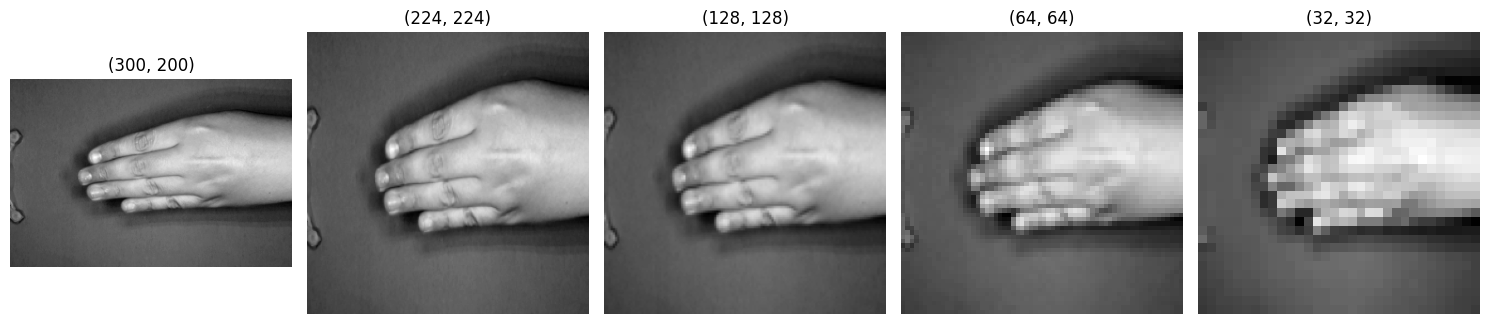

In [17]:
# convert the image to grayscale
grayscale_transform = transforms.Grayscale(num_output_channels=1)

# resize the grayscale image to different sizes
image_gray_original = grayscale_transform(image_original)
image_gray_224 = grayscale_transform(image_224)
image_gray_128 = grayscale_transform(image_128)
image_gray_64 = grayscale_transform(image_64)
image_gray_32 = grayscale_transform(image_32)

# show images
images_gray = [image_gray_original, image_gray_224, image_gray_128, image_gray_64, image_gray_32]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, img in enumerate(images_gray):
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(img.size)

plt.tight_layout()
plt.show()

In [18]:
from torch.utils.data import Subset

In [19]:
balanced_drowsy_indices = random.sample(range(len(dataset)), len(gesture_dt))
drowsy_subset = Subset(dataset, balanced_drowsy_indices)

print(f"Balanced Drowsy Dataset Size: {len(drowsy_subset)}")

Balanced Drowsy Dataset Size: 1438


In [20]:
# drosy subset class counts
class_counts = {}

if isinstance(drowsy_subset, Subset):
    original_dataset = drowsy_subset.dataset
    indices = drowsy_subset.indices

    for idx in indices:
        _, label = original_dataset.samples[idx]
        if label not in class_counts:
            class_counts[label] = 0
        class_counts[label] += 1
else:
    for _, label in drowsy_subset.samples:
        if label not in class_counts:
            class_counts[label] = 0
        class_counts[label] += 1

print(f"Drowsy: {class_counts.get(0, 0)}")
print(f"Not Drowsy: {class_counts.get(1, 0)}")


Drowsy: 787
Not Drowsy: 651


In [21]:
# transform pipeline

transform = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.Grayscale(num_output_channels=1),
    transforms.CenterCrop(84),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [22]:
from collections import defaultdict, Counter
from torch.utils.data import Dataset, DataLoader

Train set size: 2158
Test set size: 718
Train class distribution: {0: 534, 1: 545, 2: 534, 3: 545}
Test class distribution: {0: 178, 1: 181, 2: 178, 3: 181}


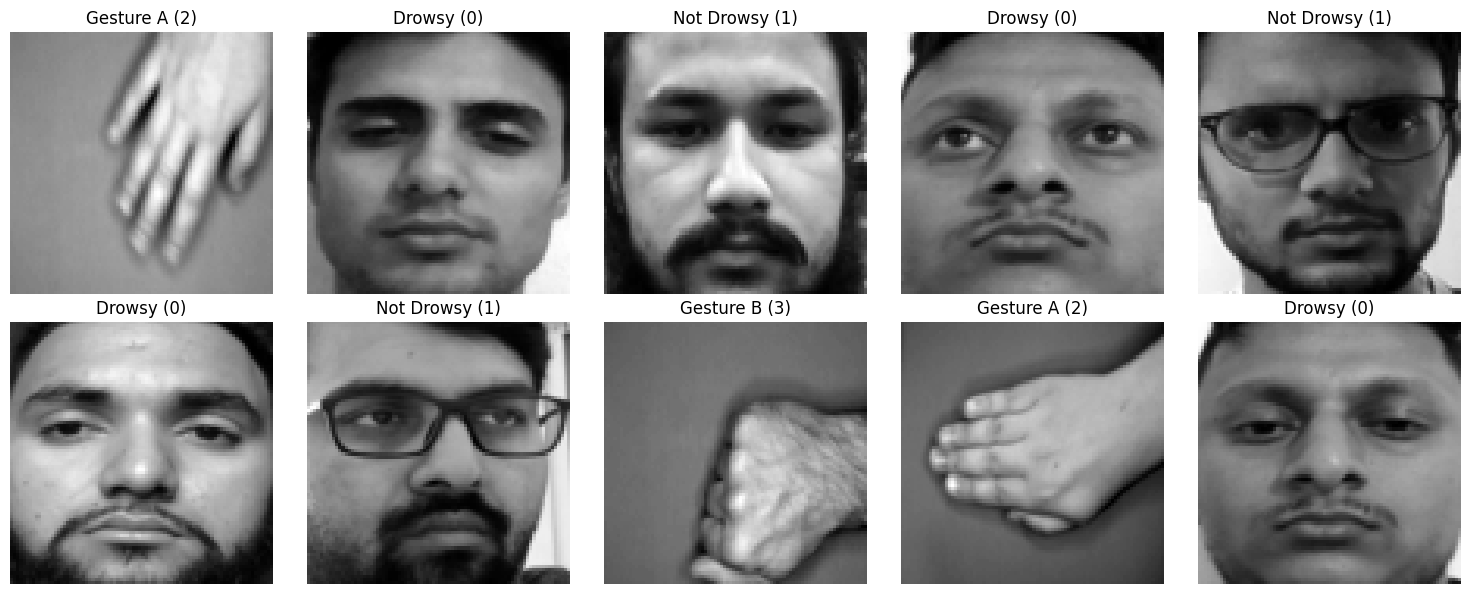

In [23]:
drowsy_raw = datasets.ImageFolder(root="../../../Driver Drowsiness Dataset (DDD)")
gesture_raw = datasets.ImageFolder(root="../../../Hand Gesture Dataset")

gesture_samples_shifted = [(path, label + 2) for path, label in gesture_raw.samples]

gesture_class_counts = Counter(label for _, label in gesture_samples_shifted)

drowsy_classified = defaultdict(list)
for path, label in drowsy_raw.samples:
    drowsy_classified[label].append(path)

drowsy_balanced_samples = []
for label in drowsy_classified:
    count = gesture_class_counts[label + 2] 
    drowsy_balanced_samples += [(path, label) for path in random.sample(drowsy_classified[label], count)]

def split_per_class(samples, test_ratio=0.25):
    label_to_paths = defaultdict(list)
    for path, label in samples:
        label_to_paths[label].append(path)

    train_paths, train_labels = [], []
    test_paths, test_labels = [], []

    for label, paths in label_to_paths.items():
        random.shuffle(paths)
        split_idx = int(len(paths) * test_ratio)
        test = paths[:split_idx]
        train = paths[split_idx:]

        test_paths += test
        test_labels += [label] * len(test)
        train_paths += train
        train_labels += [label] * len(train)

    return (train_paths, train_labels), (test_paths, test_labels)

(drowsy_train_paths, drowsy_train_labels), (drowsy_test_paths, drowsy_test_labels) = split_per_class(drowsy_balanced_samples)
(gesture_train_paths, gesture_train_labels), (gesture_test_paths, gesture_test_labels) = split_per_class(gesture_samples_shifted)

train_paths = drowsy_train_paths + gesture_train_paths
train_labels = drowsy_train_labels + gesture_train_labels

test_paths = drowsy_test_paths + gesture_test_paths
test_labels = drowsy_test_labels + gesture_test_labels

class CustomImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        image = self.transform(image)
        return image, self.labels[idx]

    def __len__(self):
        return len(self.image_paths)

train_dataset = CustomImageDataset(train_paths, train_labels, transform)
test_dataset = CustomImageDataset(test_paths, test_labels, transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")
print("Train class distribution:", dict(Counter(train_labels)))
print("Test class distribution:", dict(Counter(test_labels)))


label_names = {
    0: "Drowsy",
    1: "Not Drowsy",
    2: "Gesture A",
    3: "Gesture B"
}

def show_random_images(dataset, n=10):
    fig, axs = plt.subplots(2, n // 2, figsize=(15, 6))
    axs = axs.flatten()
    indices = random.sample(range(len(dataset)), n)

    for i, idx in enumerate(indices):
        image, label = dataset[idx]
        axs[i].imshow(image[0], cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f"{label_names.get(label, 'Unknown')} ({label})")

    plt.tight_layout()
    plt.show()

show_random_images(train_dataset)

In [24]:
from torchvision import models
from torch import backends, device
import torch.nn as nn
import torch.optim as optim

In [25]:
device = device("mps" if backends.mps.is_available() else "cpu")

# load MobileNetV3 model without pretrained weights
model = models.mobilenet_v3_small(pretrained=False)

# modify the first convolutional layer to accept 1 input channel (grayscale)
model.features[0][0] = nn.Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

# modify the final classification layer to match the number of classes
model.classifier[3] = nn.Linear(in_features=1024, out_features=4)

# move the model to the device
model.to(device)

# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

/Users/rumethsandinu/BSc (Hons) Artificial Intelligence And Data Science/Assessments/Year 3/EdgeAI/Driver-Drowsiness-Detection-System/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/rumethsandinu/BSc (Hons) Artificial Intelligence And Data Science/Assessments/Year 3/EdgeAI/Driver-Drowsiness-Detection-System/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [26]:
from torch import sigmoid, no_grad, argmax

In [27]:
num_epochs = 15
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = argmax(outputs, dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_accuracy = 100 * correct / total
    avg_train_loss = running_loss / len(train_loader)
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(train_accuracy)

    model.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0

    with no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            predicted = argmax(outputs, dim=1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_accuracy = 100 * correct / total
    avg_val_loss = val_running_loss / len(test_loader)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, "
          f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")


Epoch [1/15], Train Loss: 0.5614, Train Acc: 74.14%, Val Loss: 1.3884, Val Acc: 25.21%
Epoch [2/15], Train Loss: 0.1360, Train Acc: 95.37%, Val Loss: 1.4021, Val Acc: 25.21%
Epoch [3/15], Train Loss: 0.0988, Train Acc: 97.13%, Val Loss: 1.3884, Val Acc: 25.21%
Epoch [4/15], Train Loss: 0.0507, Train Acc: 98.24%, Val Loss: 1.4240, Val Acc: 24.79%
Epoch [5/15], Train Loss: 0.0350, Train Acc: 98.80%, Val Loss: 1.4858, Val Acc: 24.79%
Epoch [6/15], Train Loss: 0.0351, Train Acc: 98.98%, Val Loss: 1.6324, Val Acc: 24.79%
Epoch [7/15], Train Loss: 0.0287, Train Acc: 99.07%, Val Loss: 1.6917, Val Acc: 43.73%
Epoch [8/15], Train Loss: 0.0162, Train Acc: 99.58%, Val Loss: 1.1347, Val Acc: 45.26%
Epoch [9/15], Train Loss: 0.0271, Train Acc: 99.26%, Val Loss: 0.3595, Val Acc: 89.14%
Epoch [10/15], Train Loss: 0.0393, Train Acc: 98.70%, Val Loss: 0.0779, Val Acc: 97.35%
Epoch [11/15], Train Loss: 0.0044, Train Acc: 99.81%, Val Loss: 0.0324, Val Acc: 99.30%
Epoch [12/15], Train Loss: 0.0146, Train 

In [28]:
model.eval()
correct_per_class = [0] * 4
total_per_class = [0] * 4

with no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = argmax(outputs, dim=1)
        for i in range(len(labels)):
            label = labels[i].item()
            pred = predicted[i].item()
            total_per_class[label] += 1
            if pred == label:
                correct_per_class[label] += 1

label_names = {
    0: "Drowsy",
    1: "Not Drowsy",
    2: "Gesture A",
    3: "Gesture B"
}

print("\nClass-wise Accuracy:")
for i in range(4):
    acc = 100 * correct_per_class[i] / total_per_class[i] if total_per_class[i] > 0 else 0
    print(f" - {label_names[i]} ({i}): {acc:.2f}%")



Class-wise Accuracy:
 - Drowsy (0): 97.75%
 - Not Drowsy (1): 94.48%
 - Gesture A (2): 91.01%
 - Gesture B (3): 99.45%


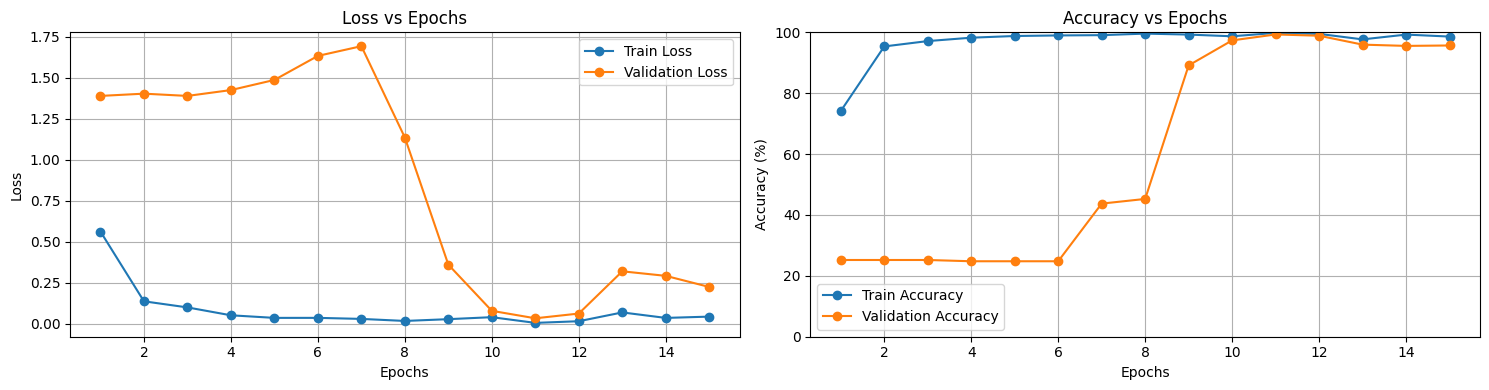

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_list, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_loss_list, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_acc_list, label='Train Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), val_acc_list, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [34]:
from torch import device

In [35]:
device = device("mps" if backends.mps.is_available() else "cpu")

# load MobileNetV3 model without pretrained weights
model = models.mobilenet_v3_small(pretrained=False)

# modify the first convolutional layer to accept 1 input channel (grayscale)
model.features[0][0] = nn.Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

# modify the final classification layer to match the number of classes
model.classifier[3] = nn.Linear(in_features=1024, out_features=4)

# move the model to the device
model.to(device)

# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = argmax(outputs, dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_accuracy = 100 * correct / total
    avg_train_loss = running_loss / len(train_loader)
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(train_accuracy)


    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%")

/Users/rumethsandinu/BSc (Hons) Artificial Intelligence And Data Science/Assessments/Year 3/EdgeAI/Driver-Drowsiness-Detection-System/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/rumethsandinu/BSc (Hons) Artificial Intelligence And Data Science/Assessments/Year 3/EdgeAI/Driver-Drowsiness-Detection-System/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/10], Train Loss: 0.5605, Train Acc: 74.56%
Epoch [2/10], Train Loss: 0.1380, Train Acc: 95.18%
Epoch [3/10], Train Loss: 0.1212, Train Acc: 96.29%
Epoch [4/10], Train Loss: 0.0459, Train Acc: 97.96%
Epoch [5/10], Train Loss: 0.0342, Train Acc: 99.17%
Epoch [6/10], Train Loss: 0.0379, Train Acc: 99.17%
Epoch [7/10], Train Loss: 0.0448, Train Acc: 98.56%
Epoch [8/10], Train Loss: 0.1040, Train Acc: 97.64%
Epoch [9/10], Train Loss: 0.1010, Train Acc: 96.80%
Epoch [10/10], Train Loss: 0.0165, Train Acc: 99.54%


In [43]:
all_labels = []
all_preds = []

model.eval()
correct_per_class = [0] * 4
total_per_class = [0] * 4

with no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = argmax(outputs, dim=1)

        all_labels.extend(labels.cpu().tolist())
        all_preds.extend(predicted.cpu().tolist())

        for i in range(len(labels)):
            label = labels[i].item()
            pred = predicted[i].item()
            total_per_class[label] += 1
            if pred == label:
                correct_per_class[label] += 1

label_names = {
    0: "Drowsy",
    1: "Not Drowsy",
    2: "Gesture A",
    3: "Gesture B"
}

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [45]:
print("\nClass-wise Accuracy:")
for i in range(4):
    acc = 100 * correct_per_class[i] / total_per_class[i] if total_per_class[i] > 0 else 0
    print(f" - {label_names[i]} ({i}): {acc:.2f}%")


Class-wise Accuracy:
 - Drowsy (0): 98.88%
 - Not Drowsy (1): 97.79%
 - Gesture A (2): 98.31%
 - Gesture B (3): 99.45%



Classification Report:
              precision    recall  f1-score   support

      Drowsy       0.99      0.99      0.99       178
  Not Drowsy       0.99      0.98      0.98       181
   Gesture A       0.98      0.98      0.98       178
   Gesture B       0.98      0.99      0.99       181

    accuracy                           0.99       718
   macro avg       0.99      0.99      0.99       718
weighted avg       0.99      0.99      0.99       718



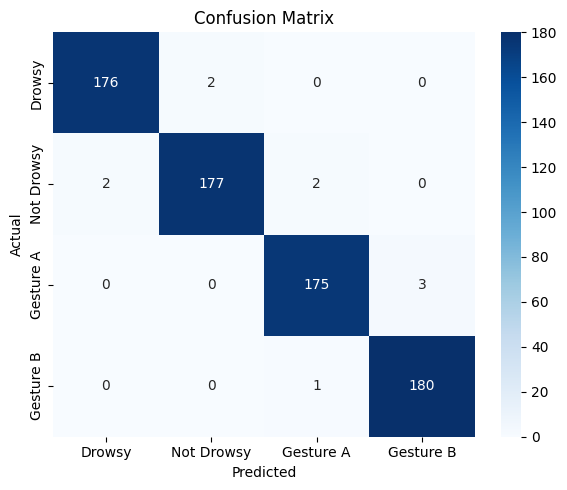

In [47]:
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=[
    label_names[0],
    label_names[1],
    label_names[2],
    label_names[3]
]))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(label_names.values()),
            yticklabels=list(label_names.values()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [48]:
from torch import save

In [49]:
save(model.state_dict(), '../models/Drowsiness-MobileNetV3-MultiTask.pth')